# Loan Prediction Project
In this project, We will be building a classification model that predicts whether customers are qualified for loan.
We will make use of customer data such as demographics, profession, income, data about their previous loan default and many others to predict  whether customers applying for loans in the future are qualified for it. This will help the company to only give loans to customers that are more likely to pay back, hence reducing the rate of impact of loan defaults on the company.

In [1]:
#Import necessary libries.

import pandas as pd
import numpy as np
#% matplotlib.inline 
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import OneHotEncoder, OrdinalEncoder

%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Data Pre-processing

In [2]:
# Load data to dataframe.

df = pd.read_csv("training Data.csv")

# Load test data for feature matrix.
X_test  =pd.read_csv("test Data.csv")

# Load test data for target vector.
y_test = pd.read_csv("Sample Prediction Dataset.csv")["risk_flag"]

In [3]:
# Rows and columns of data.

df.shape, X_test.shape, y_test.shape

((252000, 13), (28000, 12), (28000,))

In [4]:
# Dataset information.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
# First five rows of dataset.

df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


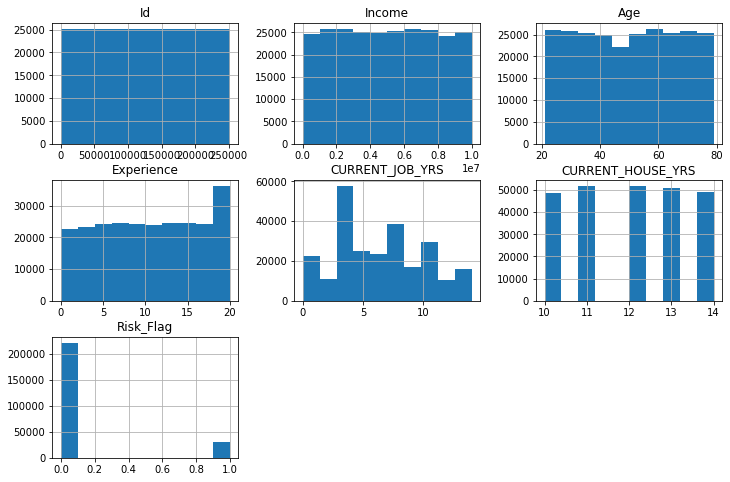

In [6]:
# Histogram distribution of numerical data.

df.hist(figsize=(12,8));

In [7]:
# Unique values of marital status.

df["Married/Single"].value_counts()

single     226272
married     25728
Name: Married/Single, dtype: int64

In [8]:
# Unique values of house ownership.

df["House_Ownership"].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [9]:
# Unique values of car ownership.

df["Car_Ownership"].value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

In [10]:
# Unique values of profession.

df["Profession"].value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [11]:
# unique values of city.

df["CITY"].value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [12]:
# First five rows.

df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


## Split
In this section, we are going to split the data into feature matrix and target vector. 
Both set of data will be used as the training data.
We will note be splitting into training and test data because the test data is separated included in the dataset file.

In [13]:
# Split data into feature matrix and target vector.
# These will be our training data.

X = df.drop(columns="Risk_Flag")
y = df["Risk_Flag"]

In [14]:
X.shape, y.shape

((252000, 12), (252000,))

## Build Model
In this section, we are going to create a pipeline with onehotencoder and logistic regression algorithm. This will convert categorical data  to numerical data and also instantiate the logistic regression model that will be used to build our model.

In [15]:
# Pipeline of onehotencoder and logisticregression.

model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=200)    
)

In [16]:
# Build Model.

model.fit(X, y)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Married/Single', 'House_Ownership',
                                     'Car_Ownership', 'Profession', 'CITY',
                                     'STATE'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=200))])

## Predict
In this section, we are going to make predictions with both our training data and test data.

In [17]:
# Make predictions with our training data.

y_predict_train = model.predict(X)
y_predict_train[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [18]:
y_test_predict = model.predict(X_test)
y_test_predict[:5]

array([0, 0, 0, 0, 0], dtype=int64)

## Evaluate
In this section, we evaluate both the training and test data prediction.

In [19]:
# Accuracy score for training set prediction.

accuracy_score(y_predict_train, y)

0.877

In [20]:
# Accuracy score for test set prediction.

accuracy_score(y_test_predict, y_test)

0.8716785714285714

In [21]:
y_test.value_counts()

0    24407
1     3593
Name: risk_flag, dtype: int64

## Communicate

In [22]:
model.predict_proba(X)[:5]

array([[0.56396884, 0.43603116],
       [0.81677559, 0.18322441],
       [0.68733804, 0.31266196],
       [0.77461897, 0.22538103],
       [0.75738093, 0.24261907]])

In [23]:
model.predict_proba(X_test)[:5]

array([[0.81135617, 0.18864383],
       [0.55965536, 0.44034464],
       [0.85276761, 0.14723239],
       [0.59476725, 0.40523275],
       [0.50067062, 0.49932938]])

In [24]:
# Feature names and importances of model.

feature_name = model.named_steps["onehotencoder"].get_feature_names()
importances = model.named_steps["logisticregression"].coef_[0]
print(feature_name[:5]), 
importances[:5]

['Id', 'Income', 'Age', 'Experience', 'Married/Single_single']


array([-6.50204578e-06, -1.97324757e-07, -3.00210941e-09, -6.35563729e-10,
       -5.02983370e-11])

In [25]:
# Create a series of feature names and importances.

odds_ratio = pd.Series(data=np.exp(importances), index=feature_name).sort_values()
#odds_ratio.head().plot(kind="barh")

In [26]:
# conf = confusion_matrix(y_test, y_test_predict)
# conf

In [27]:
#ConfusionMatrixDisplay(conf)

In [28]:
#print(classification_report(y_test, y_test_predict))

In [29]:
# confusion_matrix(y_test,)

##### Project to be continued...